In [244]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import xgboost as xgb
from datetime import datetime
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

# TRAIN

In [245]:
train = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [246]:
# train = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/train.csv')
# train

In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Types

**ORDINAL
_________
LotShape
LandContour
Utilities
LandSlope
OverallQual
OverallCond
YearBuilt*
YearRemodAdd
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageYrBlt*
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscVal*

**NOMINAL
_________
MSSubClass
MSZoning
Street
Alley
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
GarageType
PavedDrive
MiscFeature
SaleType
SaleCondition

**CONTINUOUS
_________
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MoSold
YrSold

Null Features

In [248]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

## Data Cleaning

### Duplicates

In [249]:
train['Id'].value_counts()

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

### Null Features

#### Lot Frontage

In [250]:
null_LotFrontage = train[train['LotFrontage'].isnull()]
null_LotFrontage

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952

In [251]:
train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [252]:
null_LotFrontage['Neighborhood'].value_counts()

Neighborhood
NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Somerst     8
NoRidge     8
Edwards     8
Timber      8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
Blmngtn     3
IDOTRR      3
NPkVill     2
MeadowV     2
SWISU       2
NridgHt     1
Name: count, dtype: int64

In [253]:
train.groupby('Neighborhood')['LotFrontage'].agg(pd.Series.mode)

Neighborhood
Blmngtn                   43.0
Blueste                   24.0
BrDale                    21.0
BrkSide                   50.0
ClearCr                   80.0
CollgCr           [65.0, 70.0]
Crawfor                   80.0
Edwards                   60.0
Gilbert     [59.0, 60.0, 65.0]
IDOTRR                    60.0
MeadowV                   21.0
Mitchel    [32.0, 75.0, 100.0]
NAmes                     70.0
NPkVill                   24.0
NWAmes                    80.0
NoRidge           [82.0, 92.0]
NridgHt                  107.0
OldTown                   60.0
SWISU                     60.0
Sawyer                    70.0
SawyerW                   65.0
Somerst                   75.0
StoneBr                   41.0
Timber                    85.0
Veenker                   80.0
Name: LotFrontage, dtype: object

In [254]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [255]:
train['LotFrontage'].isnull().sum()

0

#### Alley

In [256]:
train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [257]:
train['Alley'].isnull().sum()

1369

In [258]:
train['Alley'] = np.where(train['Alley'].isnull, 'NA', train['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [259]:
train['Alley'].isnull().sum()

0

#### MasVnrType

In [260]:
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [261]:
train['MasVnrType'].isnull().sum()

872

In [262]:
train['MasVnrType'] = np.where(train['MasVnrType'].isnull, 'NA', train['MasVnrType']) #it is missing None and is the largest value count

In [263]:
train['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [264]:
train['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [265]:
train['MasVnrArea'] = np.where(train['MasVnrArea'].isnull(), 0, train['MasVnrArea'])

In [266]:
train['MasVnrArea'].isnull().sum()

0

#### BsmtQual

In [267]:
train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [268]:
train['BsmtQual'].isnull().sum()

37

In [269]:
train['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [270]:
train[(train['TotalBsmtSF']==0) & (train['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0

In [271]:
train['BsmtQual'] = np.where(train['BsmtQual'].isnull, 'NA', train['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [272]:
train['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [273]:
train['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [274]:
train['BsmtCond'].isnull().sum()

37

In [275]:
train['BsmtCond'] =  np.where(train['BsmtCond'].isnull, 'NA', train['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [276]:
train['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [277]:
train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [278]:
train['BsmtExposure'].isnull().sum()

38

In [279]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0

In [280]:
train['BsmtExposure'] = np.where((train['BsmtExposure'].isnull()) & (train['TotalBsmtSF']==0), 'NA', train['BsmtExposure'])

In [281]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,144.0,Gd,TA,PConc,NA,NA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [282]:
train['BsmtExposure'] = np.where(train['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), train['BsmtExposure'])

In [283]:
train['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [284]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [285]:
train['BsmtFinType1'].isnull().sum()

37

In [286]:
train['BsmtFinType1'] = np.where(train['BsmtFinType1'], 'NA', train['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [287]:
train['BsmtFinType1'].isnull().sum()

0

#### BsmtFinType2

In [288]:
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [289]:
train['BsmtFinType2'].isnull().sum()

38

In [290]:
train[train['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,NA,296.0,Gd,TA,PConc,NA,NA,No,NA,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,N

In [291]:
train['BsmtFinType2'] = np.where((train['BsmtFinType2'].isnull() & train['BsmtUnfSF'] > 0), 'Unf', train['BsmtFinType2'])

In [292]:
train['BsmtFinType2'].isnull().sum()

37

In [293]:
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isnull(), 'NA', train['BsmtFinType2'])

In [294]:
train['BsmtFinType2'].isnull().sum()

0

#### Electrical

In [295]:
train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [296]:
train['Electrical'].isnull().sum()

1

In [297]:
train['Electrical'] = np.where(train['Electrical'].isnull(), train['Electrical'].mode(), train['Electrical']) # only 1 null value, just filled it in with mode

In [298]:
train['Electrical'].isnull().sum()

0

#### FireplaceQu

In [299]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [300]:
train['FireplaceQu'].isnull().sum()

690

In [301]:
train[train['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,NA,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,Wood,NA,NA,No,NA,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,70.0,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NA,80.0,TA,TA,PConc,NA,NA,Gd,NA,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,NA,NA,No,NA,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,NA,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd

In [302]:
train['FireplaceQu'] = np.where((train['FireplaceQu'].isnull() & train['Fireplaces']==0), 'NA', train['FireplaceQu'])

In [303]:
train['FireplaceQu'].isnull().sum()

0

#### GarageType

In [304]:
train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [305]:
train['GarageType'].isnull().sum()

81

In [306]:
train['GarageType'] = np.where((train['GarageType'].isnull() & (train['GarageCars']== 0)), 'NA', train['GarageType']) #if 0 cars then no garage

In [307]:
train['GarageType'].isnull().sum()

0

#### GarageYrBlt

In [308]:
train['GarageYrBlt'].isnull().sum()

81

In [309]:
train['GarageYrBlt'] = np.where((train['GarageYrBlt'].isnull() & (train['GarageCars']==0)), 0, train['GarageYrBlt']) #if 0 cars then no garage

In [310]:
train['GarageYrBlt'].isnull().sum()

0

#### GarageFinish

In [311]:
train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [312]:
train['GarageFinish'].isnull().sum()

81

In [313]:
train['GarageFinish'] = np.where((train['GarageFinish'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageFinish']) #if 0 cars then no garage

In [314]:
train['GarageFinish'].isnull().sum()

0

#### GarageQual

In [315]:
train['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [316]:
train['GarageQual'].isnull().sum()

81

In [317]:
train['GarageQual'] = np.where((train['GarageQual'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageQual']) #if 0 cars then no garage

In [318]:
train['GarageQual'].isnull().sum()

0

#### GarageCond

In [319]:
train['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [320]:
train['GarageCond'].isnull().sum()

81

In [321]:
train['GarageCond'] = np.where((train['GarageCond'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageCond']) #if 0 cars then no garage

In [322]:
train['GarageCond'].isnull().sum()

0

#### PoolQC

In [323]:
train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [324]:
train['PoolQC'].isnull().sum()

1453

In [325]:
train[train['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,NA,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Gd,NA,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,NA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,NA,162.0,Gd,TA,PConc,NA,NA,Mn,NA,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,NA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,NA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NA,350.0,Gd,TA,PConc,NA,NA,Av,NA,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,NA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,NA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,NA,119.0,TA,TA,CBlock,NA,NA,No,NA,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,NA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Ex,Gd,Stone,NA,NA,No,NA,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,NA,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,NA,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ

In [326]:
train['PoolQC'] = np.where((train['PoolQC'].isnull() & (train['PoolArea']==0)), 'NA', train['PoolQC']) #if no pool area means no pool

In [327]:
train['PoolQC'].isnull().sum()

0

#### Fence

In [328]:
train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [329]:
train['Fence'].isnull().sum()

1179

In [330]:
train['Fence'] = np.where(train['Fence'].isnull(), 'NA', train['Fence']) #largest value that's null and missing category 

In [331]:
train['Fence'].isnull().sum()

0

#### MiscFeature

In [332]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [333]:
train['MiscFeature'].isnull().sum()

1406

In [334]:
train['MiscFeature'] = np.where((train['MiscFeature'].isnull() & (train['GarageType']=='2Types')), 'Gar2', train['MiscFeature']) #if 2types of garage then its 2nd garage

In [335]:
train['MiscFeature'] = np.where(train['MiscFeature'].isnull(), 'NA', train['MiscFeature'])

In [336]:
train['MiscFeature'].isnull().sum()

0

In [337]:
train.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

### Datatypes

In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Feature Engineering

#### Age of house

In [339]:
train['age'] = datetime.now().year - train['YearBuilt']


#### Age of remodel

In [340]:
train['remodel_age'] = datetime.now().year - train['YearRemodAdd']

#### Living to Lot Area Ratio

In [341]:
train['livingtolot'] = (train['GrLivArea']/train['LotArea']).round(2)

#### Has Paved Driveway

In [342]:
train['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [343]:
train['drivewaypaved'] = np.where(train['PavedDrive']=='Y', 1, 0)
train['drivewaypaved'].value_counts()

drivewaypaved
1    1340
0     120
Name: count, dtype: int64

#### Has Fireplace

In [344]:
train['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [345]:
train['has_fireplace'] = np.where(train['Fireplaces']> 0, 1, 0)

#### Has Pool

In [346]:
train['has_pool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [347]:
train['has_pool'].value_counts()

has_pool
0    1453
1       7
Name: count, dtype: int64

## Outliers

### LotArea

<Axes: >

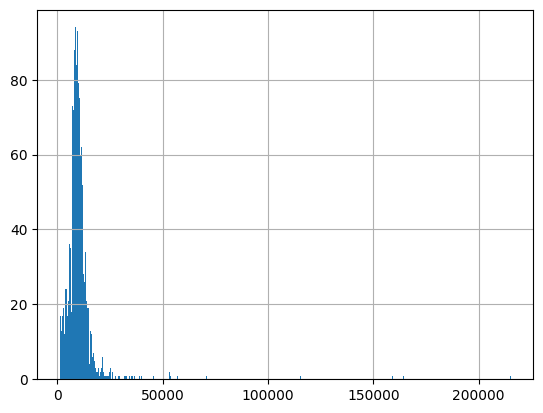

In [348]:
train['LotArea'].hist(bins=500)

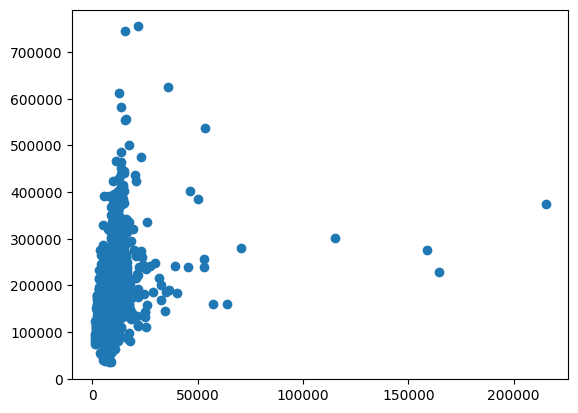

In [349]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [350]:
train = train.drop(train[train['LotArea']> 150000].index).reset_index(drop=True)

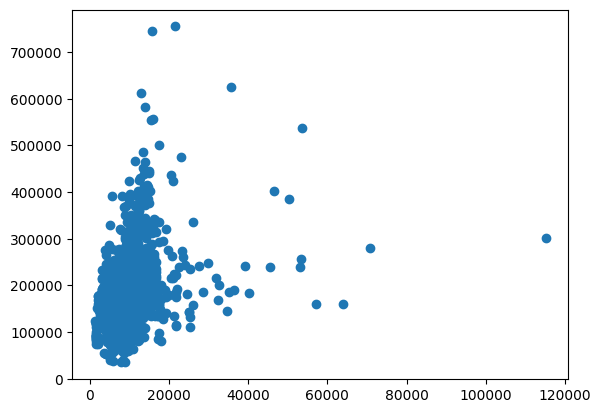

In [351]:
plt.scatter(train['LotArea'], train['SalePrice'])

## Skew

In [352]:
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

MSSubClass        1.405043
LotFrontage       2.149244
LotArea           6.186717
MasVnrArea        2.684427
BsmtFinSF1        1.695853
BsmtFinSF2        4.288669
BsmtUnfSF         0.919753
TotalBsmtSF       1.532585
1stFlrSF          1.384597
2ndFlrSF          0.812622
LowQualFinSF      9.001760
GrLivArea         1.372562
BsmtHalfBath      4.130622
KitchenAbvGr      4.483125
WoodDeckSF        1.514684
OpenPorchSF       2.364643
EnclosedPorch     3.085809
3SsnPorch        10.293487
ScreenPorch       4.117285
PoolArea         14.812955
MiscVal          24.519727
SalePrice         1.893486
livingtolot       2.867890
has_pool         14.337743
dtype: float64

In [353]:
len(train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75])

24

In [354]:
train['MSSubClass'] = np.log1p(train['MSSubClass'])
train['LotFrontage'] = np.log1p(train['LotFrontage'])
train['LotArea'] = np.log1p(train['LotArea'])
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])
train['BsmtFinSF2'] = np.log1p(train['BsmtFinSF2'])
train['BsmtUnfSF'] = np.log1p(train['BsmtUnfSF'])
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])
train['2ndFlrSF'] = np.log1p(train['2ndFlrSF'])
train['LowQualFinSF'] = np.log1p(train['LowQualFinSF'])
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['BsmtHalfBath'] = np.log1p(train['BsmtHalfBath'])
train['KitchenAbvGr'] = np.log1p(train['KitchenAbvGr'])
train['WoodDeckSF'] = np.log1p(train['WoodDeckSF'])
train['OpenPorchSF'] = np.log1p(train['OpenPorchSF'])
train['EnclosedPorch'] = np.log1p(train['EnclosedPorch'])
train['3SsnPorch'] = np.log1p(train['3SsnPorch'])
train['ScreenPorch'] = np.log1p(train['KitchenAbvGr'])
train['PoolArea'] = np.log1p(train['PoolArea'])
train['MiscVal'] = np.log1p(train['MiscVal'])
train['SalePrice'] = np.log1p(train['SalePrice'])
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

BsmtFinSF2        2.541590
LowQualFinSF      7.452254
BsmtHalfBath      3.957791
KitchenAbvGr      3.864695
EnclosedPorch     2.108812
3SsnPorch         7.726645
ScreenPorch       2.953752
PoolArea         14.348154
MiscVal           5.283240
livingtolot       2.867890
has_pool         14.337743
dtype: float64

## Correlation

In [355]:
train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=True)

livingtolot      0.005010
BsmtHalfBath     0.007991
Id               0.015110
MSSubClass       0.020076
BsmtFinSF2       0.036190
OverallCond      0.037583
YrSold           0.038143
LowQualFinSF     0.054257
MoSold           0.057394
3SsnPorch        0.059319
has_pool         0.070184
PoolArea         0.070298
MiscVal          0.075341
ScreenPorch      0.139347
KitchenAbvGr     0.144016
2ndFlrSF         0.181187
BsmtFinSF1       0.206173
EnclosedPorch    0.206613
BedroomAbvGr     0.208109
BsmtUnfSF        0.209546
BsmtFullBath     0.233094
drivewaypaved    0.299801
HalfBath         0.317006
WoodDeckSF       0.345587
LotFrontage      0.347866
GarageYrBlt      0.349209
TotalBsmtSF      0.372008
LotArea          0.398199
MasVnrArea       0.414968
OpenPorchSF      0.462655
Fireplaces       0.486786
has_fireplace    0.508946
TotRmsAbvGrd     0.534084
YearRemodAdd     0.568387
remodel_age      0.568387
YearBuilt        0.588700
age              0.588700
FullBath         0.594231
1stFlrSF    

## Datatype conversions

In [356]:
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['GarageFinish'] = train['GarageFinish'].astype(str)


In [357]:
train['LotFrontage'] = train['LotFrontage'].astype(int)
train['MasVnrArea'] = train['MasVnrArea'].astype(int)

In [358]:
train['YearBuilt'] = pd.to_datetime(train['YearBuilt'], format='%Y').dt.year
train['YearRemodAdd'] = pd.to_datetime(train['YearRemodAdd'], format='%Y').dt.year


In [359]:
train['MoSold'] = pd.to_datetime(train['MoSold'], format='%m').dt.month

In [360]:
train['YrSold'] = pd.to_datetime(train['YrSold'], format='%Y').dt.strftime('%Y')

In [361]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)

## Encoding/Scaling

In [362]:
df = train.copy()

### Ordinal

In [363]:
ord_feats = train[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,3.0,3.0,0.0,0.0,5.0,5.0,79.0,38.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,4.0,1.0,3.0,2.0,0.0,65.0,3.0,5.0,5.0,3.0,2.0,0.0
1454,3.0,3.0,0.0,0.0,6.0,8.0,44.0,56.0,0.0,2.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,30.0,2.0,5.0,5.0,3.0,0.0,17.0
1455,3.0,3.0,0.0,0.0,4.0,5.0,51.0,46.0,3.0,4.0,0.0,0.0,2.0,0.0,5.0,2.0,1.0,2.0,6.0,0.0,37.0,3.0,5.0,5.0,3.0,4.0,0.0


In [364]:
df.drop(columns=ord_feats, inplace=True)
df = df.merge(new_ord_feats, left_index=True, right_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1,4.110873864173311,RL,4,9.042040,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5,PConc,6.561031,0.000000,5.017280,6.753438,GasA,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,Attchd,2,548,Y,0.000000,4.127134,0.000000,0.0,0.526589,0.0,NA,2,2008,WD,Normal,12.247699,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,2,3.044522437723423,RL,4,9.169623,Pave,NA,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,0,CBlock,6.886532,0.000000,5.652489,7.141245,GasA,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,Attchd,2,460,Y,5.700444,0.000000,0.000000,0.0,0.526589,0.0,NA,5,2007,WD,Normal,12.109016,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,3,4.110873864173311,RL,4,9.328212,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5,PConc,6.188264,0.000000,6.075346,6.825460,GasA,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,Attchd,2,608,Y,0.000000,3.761200,0.000000,0.0,0.526589,0.0,NA,9,2008,WD,Normal,12.317171,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,4,4.2626798770413155,RL,4,9.164401,Pave,NA,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,0,BrkTil,5.379897,0.000000,6.293419,6.629363,GasA,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,Detchd,3,642,Y,0.000000,3.583519,5.609472,0.0,0.526589,0.0,NA,2,2006,WD,Abnorml,11.849405,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,5,4.110873864173311,RL,4,9.565284,Pave,NA,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5,PConc,6.486161,0.000000,6.196444,7.044033,GasA,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,Attchd,3,836,Y,5.262690,4.442651,0.000000,0.0,0.526589,0.0,NA,12,2008,WD,Normal,12.429220,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,4.110873864173311,RL,4,8.976894,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0,PConc,0.000000,0.000000,6.860664,6.860664,GasA,SBrkr,6.860664,6.543912,0.0,7.407318,0,0.000000,2,1,3,0.693147,7,1,Attchd,2,460,Y,0.000000,3.713572,0.000000,0.0,0.526589,0.0,NA,8,2007,WD,Normal,12.072547,25,24,0.21,1,1,0,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,1457,3.044522437723423,RL,4,9

## Nominal Encoding

In [365]:
nom_feats = train[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition'
]]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1,0,0,0,0,0,0,0,0

In [366]:
df['MSSubClass'].info

<bound method Series.info of 0        4.110873864173311
1        3.044522437723423
2        4.110873864173311
3       4.2626798770413155
4        4.110873864173311
               ...        
1452     4.110873864173311
1453     3.044522437723423
1454    4.2626798770413155
1455     3.044522437723423
1456     3.044522437723423
Name: MSSubClass, Length: 1457, dtype: object>

In [367]:
df.drop(columns=nom_feats, inplace=True)
df = df.merge(nom_feats_encoded, left_index=True, right_index=True)
df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1,4,9.042040,5,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2,548,0.000000,4.127134,0.000000,0.0,0.526589,0.0,2,2008,12.247699,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,4,9.169623,0,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,2,460,5.700444,0.000000,0.000000,0.0,0.526589,0.0,5,2007,12.109016,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,4,9.328212,5,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2,608,0.000000,3.761200,0.000000,0.0,0.526589,0.0,9,2008,12.317171,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,4,9.164401,0,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,3,642,0.000000,3.583519,5.609472,0.0,0.526589,0.0,2,2006,11.849405,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,4,9.565284,5,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,3,836,5.262690,4.442651,0.000000,0.0,0.526589,0.0,12,2008,12.429220,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Scaling

In [368]:
scaler_minmax = MinMaxScaler()
cont_feats = train[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'
]]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.666289,0.333333,0.00000,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.75,0.589563,0.779126,0.704481,0.000000,0.0,0.605455,0.0,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.5,0.402847,0.000000,0.000000,0.000000,0.884491,0.786968,0.396460,0.857277,0.0,0.564152,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.50,0.324401,0.000000,0.588869,0.000000,0.0,0.605455,0.0,0.636364,0.25
1453,0.5,0.516442,0.571429,0.772504,0.698955,0.822539,0.842121,0.690649,0.000000,0.0,0.645566,0.333333,0.00000,0.666667,0.0,0.375,0.5,0.416667,0.666667,0.50,0.352609,0.867250,0.000000,0.000000,0.0,0.605455,0.0,0.090909,1.00
1454,0.5,0.432481,0.000000,0.650620,0.000000,0.873788,0.808700,0.479880,0.923592,0.0,0.688447,0.000000,0.00000,0.666667,0.0,0.500,0.5,0.583333,0.666667,0.25,0.177715,0.000000,0.651870,0.000000,0.0,0.605455,0.0,0.363636,1.00
1455,0.5,0.448539,0.000000,0.452858,0.950784,0.000000,0.801091,0.443104,0.000000,0.0,0.414179,0.333333,0.00000,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.25,0.169252,0.874272,0.000000,0.748554,0.0,0.605455,0.0,0.272727,1.00


In [369]:
df.drop(columns=cont_feats, inplace=True)
df = df.merge(new_cont_feats, left_index=True, right_index=True)
df

,Id,SalePrice,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,...,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,12.247699,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,2,12.109016,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,3,12.317171,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,4,11.849405,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,5,12.429220,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926

## Drop Features

In [370]:
df

,Id,SalePrice,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,...,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,12.247699,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,2,12.109016,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,3,12.317171,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,4,11.849405,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,5,12.429220,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926

## Train Test Split

In [371]:
y = df['SalePrice']
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1452    12.072547
1453    12.254868
1454    12.493133
1455    11.864469
1456    11.901590
Name: SalePrice, Length: 1457, dtype: float64

In [372]:
x = df.drop(['Id', 'SalePrice'], axis=1)
x

,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass_4.110873864173311,MSSubClass_3.044522437723423,MSSubClass_4.2626798770413155,MSSubClass_3.9318256327243257,MSSubClass_5.25227342804663,MSSubClass_3.828641396489095,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_3.4339872044851463,MSSubClass_4.454347296253507,MSSubClass_4.394449154672439,MSSubClass_5.081404364984463,MSSubClass_4.330733340286331,MSSubClass_5.198497031265826,MSSubClass_3.713572066704308,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,...,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.417379,0.714286,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.481212,0.714286,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.5,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.5,0.534093,0.714286,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.66

In [373]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1165, 238), (1165,), (292, 238), (292,))

In [374]:
xgbr = xgb.XGBRegressor(n_estimators=1000, max_depth=2)
xgbr.fit(xtrain, ytrain)
test_pred = xgbr.predict(xtest)
test_pred

array([12.326642 , 12.053394 , 11.866276 , 12.653258 , 12.564096 ,
       11.485229 , 12.3184805, 11.835633 , 12.302144 , 12.523218 ,
       11.602313 , 12.2067175, 12.497141 , 11.788925 , 12.047447 ,
       11.969596 , 12.250016 , 11.522678 , 11.883415 , 11.859905 ,
       12.560007 , 11.853773 , 11.716056 , 11.465305 , 11.705495 ,
       11.856644 , 12.043256 , 11.74288  , 11.927609 , 11.732706 ,
       12.020099 , 12.278754 , 12.019111 , 12.19456  , 12.167463 ,
       11.905047 , 11.643605 , 11.649138 , 11.938105 , 11.724394 ,
       11.65869  , 12.862231 , 12.071166 , 11.735458 , 12.013321 ,
       12.330912 , 11.747352 , 12.215326 , 11.346307 , 12.556025 ,
       12.349788 , 12.840221 , 11.363488 , 12.435876 , 12.70052  ,
       12.129332 , 12.641872 , 11.549778 , 11.875865 , 11.7324095,
       11.991646 , 11.691351 , 11.951475 , 11.885596 , 11.714022 ,
       11.608326 , 12.171502 , 12.063399 , 11.734352 , 11.842665 ,
       11.830659 , 11.713727 , 11.758841 , 11.800565 , 12.8359

In [375]:
train_pred = xgbr.predict(xtrain)
train_pred 

array([11.430365, 11.41999 , 11.505057, ..., 11.443444, 11.579249,
       11.895592], dtype=float32)

In [376]:
ytrain = np.expm1(ytrain)
ytest = np.expm1(ytest)
test_pred = np.expm1(test_pred)
train_pred = np.expm1(train_pred)

## RMSE

In [377]:
print('RMSE Test:', mean_squared_error(ytest, test_pred)**0.5)
print('RMSE Train:', mean_squared_error(ytrain, train_pred)**0.5)

RMSE Test: 34769.46533093283
RMSE Train: 3485.5796209695877


Removed outliers, transformed skews
RMSE Test: 32851.273268259174
RMSE Train: 3333.8950649465446

Baseline: removed outliers
RMSE : 31810.004274811527

# TEST

In [378]:
test = pd.read_csv(r'D:\Data Science\Projects\Housing Project\Data\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [379]:
# test = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/test.csv')
# test

## Data Cleaning

### Null Features

In [380]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### MSZoning

In [381]:
test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [382]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,NaN,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,NaN,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [383]:
# test['MSZoning'] = train.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [384]:
mode_dict = train.groupby('Neighborhood')['MSZoning'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['MSZoning'].isnull(), 'MSZoning'] = test['Neighborhood'].map(mode_dict)

In [385]:
test['MSZoning'].isnull().sum()

0

#### Lot Frontage

In [386]:
mode_dict = train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.mean()).to_dict()
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = test['Neighborhood'].map(mode_dict)

In [387]:
test['LotFrontage'].isnull().sum()

0

#### Alley

In [388]:
test['Alley'] = np.where(test['Alley'].isnull, 'NA', test['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [389]:
test['Alley'].isnull().sum()

0

#### Utilities

In [390]:
test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [391]:
test['Utilities'] = np.where(test['Utilities'].isnull(), train['Utilities'].mode(), test['Utilities'])

In [392]:
test['Utilities'].isnull().sum()

0

#### Exterior1st

In [393]:
test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [394]:
test[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,NaN,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [395]:
test['Exterior1st'] = np.where(test['Exterior1st'].isnull(), train['Exterior1st'].mode(), test['Exterior1st'])

In [396]:
test['Exterior1st'].isnull().sum()

0

#### Exterior2nd

In [397]:
test['Exterior2nd'] = np.where(test['Exterior2nd'].isnull(), train['Exterior2nd'].mode(), test['Exterior2nd'])

In [398]:
test['Exterior2nd'].isnull().sum()

0

#### MasVnrType

In [399]:
test['MasVnrType']

0           NaN
1       BrkFace
2           NaN
3       BrkFace
4           NaN
         ...   
1454        NaN
1455        NaN
1456        NaN
1457        NaN
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [400]:
test['MasVnrType'] = np.where(test['MasVnrType'].isnull, 'NA', test['MasVnrType']) #it is missing None and is the largest value count

In [401]:
test['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [402]:
test[test['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,4.012658,12891,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,FV,90.000000,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RL,70.000000,8749,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,4.012658,7750,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,87.000000,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,FV,3.732558,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,59.000000,15810,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,4.012658,11950,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,85.000000,9965,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,FV,112.000000,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip

In [403]:
test['MasVnrArea'] = np.where(test['MasVnrArea'], 0, test['MasVnrArea'])

In [404]:
test['MasVnrArea'].isnull().sum()

0

#### BsmtQual

In [405]:
test['BsmtQual'] = np.where(test['BsmtQual'].isnull, 'NA', test['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [406]:
test['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [407]:
test['BsmtCond'] =  np.where(test['BsmtCond'].isnull, 'NA', test['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [408]:
test['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [409]:
test['BsmtExposure'] = np.where((test['BsmtExposure'].isnull()) & (test['TotalBsmtSF']==0), 'NA', test['BsmtExposure'])

In [410]:
test['BsmtExposure'] = np.where(test['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), test['BsmtExposure'])

In [411]:
test['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [412]:
test['BsmtFinType1'] = np.where(test['BsmtFinType1'], 'NA', test['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [413]:
test['BsmtFinType1'].isnull().sum()

0

#### BsmtFinSF1

In [414]:
test[test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [415]:
test['BsmtFinSF1'] = np.where(test['BsmtFinSF1'].isnull(), 0, test['BsmtFinSF1'])

In [416]:
test['BsmtFinSF1'].isnull().sum()

0

#### BsmtFinType2

In [417]:
test['BsmtFinType2'] = np.where((test['BsmtFinType2'].isnull() & test['BsmtUnfSF'] > 0), 'Unf', test['BsmtFinType2'])

In [418]:
test['BsmtFinType2'] = np.where(test['BsmtFinType2'].isnull(), 'NA', test['BsmtFinType2'])

In [419]:
test['BsmtFinType2'].isnull().sum()

0

#### BsmtFinSF2

In [420]:
test[test['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [421]:
test['BsmtFinSF2'] = np.where(test['BsmtFinSF2'].isnull(), 0 , test['BsmtFinSF2'])

In [422]:
test['BsmtFinSF2'].isnull().sum()

0

#### BsmtUnfSF

In [423]:
test[test['BsmtUnfSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [424]:
test['BsmtUnfSF'] = np.where(test['BsmtUnfSF'].isnull(), 0, test['BsmtUnfSF'])

In [425]:
test['BsmtUnfSF'].isnull().sum()

0

#### TotalBsmtSF

In [426]:
test['TotalBsmtSF'] = np.where(test['TotalBsmtSF'].isnull(), 0 , test['TotalBsmtSF'])

In [427]:
test['BsmtUnfSF'].isnull().sum()

0

#### BsmtFullBath

In [428]:
test[test['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [429]:
test['BsmtFullBath'] = np.where(test['BsmtFullBath'].isnull(), 0, test['BsmtFullBath'])

In [430]:
test['BsmtFullBath'].isnull().sum()

0

#### BsmtHalfBath

In [431]:
test[test['BsmtHalfBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [432]:
test['BsmtHalfBath'] = np.where(test['BsmtHalfBath'].isnull(), 0, test['BsmtHalfBath'])

#### KitchenQual

In [433]:
test[test['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


#### FireplaceQU

In [434]:
test['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1393
2      64
0       2
Name: count, dtype: int64

In [435]:
mode_dict = train.groupby('KitchenAbvGr')['KitchenQual'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['KitchenQual'].isnull(), 'KitchenQual'] = test['KitchenAbvGr'].map(mode_dict)

In [436]:
test['KitchenQual'].isnull().sum()

1

In [488]:
test[test['KitchenQual'].isnull()][['KitchenAbvGr', 'KitchenQual']]

,KitchenAbvGr,KitchenQual
95,0.693147,NaN


#### Functional

In [437]:
test['Functional'] = np.where(test['Functional'].isnull(), train['Functional'].mode(), test['Functional'])

In [438]:
test['Functional'].isnull().sum()

0

#### FireplaceQu

In [439]:
test['FireplaceQu'] = np.where((test['FireplaceQu'].isnull()) & (test['Fireplaces'] == 0), 'NA', test['FireplaceQu'])

In [440]:
test['FireplaceQu'].isnull().sum()

0

#### GarageType

In [441]:
test['GarageType'] = np.where((test['GarageType'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageType'])

In [442]:
test['GarageType'].isnull().sum()

0

#### GarageYrBuilt

In [443]:
test['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
2008.0    32
1977.0    31
2000.0    28
2002.0    27
1998.0    27
1993.0    27
1950.0    27
1956.0    25
1997.0    25
1999.0    24
1978.0    22
1968.0    22
1976.0    21
1958.0    21
2001.0    21
1967.0    21
1994.0    21
1996.0    20
1979.0    20
1975.0    19
1930.0    19
1959.0    19
1920.0    19
1960.0    18
1961.0    18
1966.0    18
1954.0    18
1963.0    18
1969.0    17
1980.0    17
1995.0    17
1974.0    17
1964.0    17
1973.0    15
1962.0    14
1992.0    14
1957.0    14
1965.0    13
1952.0    13
1972.0    13
1970.0    12
1939.0    12
1971.0    11
1953.0    11
1955.0    11
1951.0    11
1984.0    11
1940.0    11
1990.0    10
1926.0     9
1989.0     9
1938.0     8
1985.0     8
1991.0     8
2009.0     8
1948.0     8
1987.0     7
1910.0     7
1945.0     6
1949.0     6
1988.0     6
1986.0     6
1946.0     5
1981.0     5
1982.0     5
1924.0     5
1925.0     5
1915.0     5
1900.0     5
1942.0     4
1927.0     4


In [444]:
test[test['GarageYrBlt'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,98.000000,13260,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RM,56.000000,4485,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,NA,NA,No,NA,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NA,NaN,NaN,0.0,0.0,NaN,NaN,P,51,0,135,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,100.000000,9045,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,1910,1950,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,Fa,BrkTil,NA,NA,Mn,NA,0.0,Unf,0.0,840.0,840.0,Grav,Fa,N,FuseF,1128,1128,0,2256,0.0,0.0,2,0,4,2,Fa,12,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,18,18,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RM,60.000000,12900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,8,1912,2009,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,Gd,Gd,PConc,NA,NA,No,NA,0.0,Unf,0.0,780.0,780.0,GasA,Ex,Y,SBrkr,780,780,0,1560,0.0,0.0,1,1,3,1,Gd,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,344,0,0,0,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,60.000000,9900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,1.5Fin,5,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,Fa,Fa,BrkTil,NA,NA,No,NA,1026.0,Unf,0.0,186.0,1212.0,GasA,TA,N,SBrkr,1212,180,0,1392,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,168,0,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal
98,1559,70,C (all),3.720000,6449,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2Story,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,73.0,Unf,0.0,634.0,707.0,GasW,TA,N,SBrkr,942,942,0,1884,0.0,0.0,1,1,4,1,TA,7,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,239,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Abnorml
100,1561,90,RL,72.000000,10773,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,NA,0.0,Fa,Fa,CBlock,NA,NA,No,NA,704.0,Unf,0.0,1128.0,1832.0,GasA,TA,N,SBrkr,1832,0,0,1832,2.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
130,1591,20,RL,64.000000,6410,Pave,NA,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1958,Hip,CompShg,WdShing,Wd Shng,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,0.0,Unf,0.0,960.0,960.0,GasA,Ex,Y,SBrkr,960,0,0,960,0.0,0.0,1,0,3,1,TA,5,Typ,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
133,1594,90,RH,60.000000,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NA,NA,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
134,1595,50,RL,51.000000,9839,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,NA,0.0,Unf

In [445]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) & (test['GarageArea']== 0.0), 0.0, test['GarageYrBlt'])

In [446]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) , test['YearRemodAdd'], test['GarageYrBlt'])

In [447]:
test['GarageYrBlt'].isnull().sum()

0

In [448]:
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

#### GarageFinish

In [449]:
test['GarageFinish'] = np.where((test['GarageFinish'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageFinish'])

In [450]:
test['GarageFinish'].isnull().sum()

2

In [451]:
test['GarageFinish'] = np.where(test['GarageFinish'].isnull(), train['GarageFinish'].mode(), test['GarageFinish'])

#### GarageCars

In [452]:
test['GarageCars'] = np.where(test['GarageCars'].isnull(), train['GarageCars'].mode(), test['GarageCars'])

In [453]:
test['GarageCars'].isnull().sum()

0

#### GarageArea

In [454]:
test['GarageArea'] = np.where(test['GarageArea'].isnull(), train['GarageArea'].mean(), test['GarageArea'])

In [455]:
test['GarageArea'].isnull().sum()

0

#### GarageQual

In [456]:
test['GarageQual'].value_counts()

GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [457]:
test['GarageQual'] = np.where((test['GarageQual'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageQual'])

In [458]:
test[test['GarageQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,PConc,NA,NA,Mn,NA,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NA,Detchd,1983,Unf,1.0,360.00000,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,TA,TA,BrkTil,NA,NA,No,NA,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,1999,Unf,2.0,472.97186,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [459]:
# test['GarageQual'] = test.groupby('GarageFinish')['GarageQual'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [460]:
mode_dict = train.groupby('GarageFinish')['GarageQual'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['GarageQual'].isnull(), 'GarageQual'] = test['GarageFinish'].map(mode_dict)

In [461]:
test['GarageQual'].isnull().sum()

0

#### GarageCond

In [462]:
test['GarageCond'].value_counts()

GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [463]:
test['GarageCond'] = np.where((test['GarageCond'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageCond'])

In [464]:
# test['GarageCond'] = test.groupby('GarageFinish')['GarageCond'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [465]:
mode_dict = train.groupby('GarageFinish')['GarageCond'].apply(lambda x: x.mode().iloc[0]).to_dict()
test.loc[test['GarageCond'].isnull(), 'GarageCond'] = test['GarageFinish'].map(mode_dict)

#### PoolQC

In [466]:
test['PoolQC'].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [467]:
test['PoolQC'] = np.where((test['PoolQC'].isnull()) & (test['PoolArea']== 0.0), 'NA', test['PoolQC'])

In [468]:
test['PoolQC'].isnull().sum()

3

In [469]:
test[test['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,75.0,9532,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,104.0,23920,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,No,NA,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,200.0,43500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NA,2Types,1953,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [470]:
test['PoolQC'] = np.where(test['PoolQC'].isnull(), train['PoolQC'].mode(), test['PoolQC'])

In [471]:
test['PoolQC'].isnull().sum()

0

#### Fence

In [472]:
test['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [473]:
test['Fence'] = np.where((test['Fence'].isnull()), 'NA', test['Fence'])

In [474]:
test['Fence'].isnull().sum()

0

#### MiscFeature

In [475]:
test['MiscFeature'] = np.where((test['MiscFeature'].isnull() & (test['GarageType']=='2Types')), 'Gar2', test['MiscFeature']) #if 2types of garage then its 2nd garage

In [476]:
test['MiscFeature'].isnull().sum()

1391

In [477]:
test['MiscFeature'] = np.where(test['MiscFeature'].isnull(), 'NA', test['MiscFeature'])

In [478]:
test['MiscFeature'].isnull().sum()

0

#### SaleType

In [479]:
test['SaleType'] = np.where(test['SaleType'].isnull(), train['SaleType'].mode(), test['SaleType'])

In [480]:
test['MiscFeature'].isnull().sum()

0

In [481]:
test.isnull().sum().sort_values(ascending=False)

KitchenQual      1
Id               0
MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
ScreenPorch      0
GarageArea       0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
CentralAir       0
HeatingQC        0
Heating          0
LotConfig        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
Utilities        0
YearBuilt        0
LandContour 

## Skew


In [482]:
test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

MSSubClass        1.346690
LotArea           3.115217
BsmtFinSF1        1.166330
BsmtFinSF2        4.042954
BsmtUnfSF         0.919923
TotalBsmtSF       0.805066
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtHalfBath      3.782976
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
dtype: float64

In [483]:
len(test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75])

21

In [484]:
test['MSSubClass'] = np.log1p(test['MSSubClass'])
test['LotFrontage'] = np.log1p(test['LotFrontage'])
test['LotArea'] = np.log1p(test['LotArea'])
test['MasVnrArea'] = np.log1p(test['MasVnrArea'])
test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
test['ScreenPorch'] = np.log1p(test['KitchenAbvGr'])
test['PoolArea'] = np.log1p(test['PoolArea'])
test['MiscVal'] = np.log1p(test['MiscVal'])


In [485]:
# test['MSSubClass'] = np.log1p(test['MSSubClass'])
# test['LotArea'] = np.log1p(train['LotArea'])
# test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
# test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
# test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
# test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
# test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
# test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
# test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
# test['GrLivArea'] = np.log1p(test['GrLivArea'])
# test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
# test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
# test['TotRmsAbvGrd'] = np.log1p(test['TotRmsAbvGrd'])
# test['Fireplaces'] = np.log1p(test['Fireplaces'])
# test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
# test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
# test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
# test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
# test['ScreenPorch'] = np.log1p(test['ScreenPorch'])
# test['PoolArea'] = np.log1p(test['PoolArea'])
# test['MiscVal'] = np.log1p(test['MiscVal'])
# test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

## Encoding/Scaling

### Ordinal

In [486]:
ord_feats = test[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

# ord = OrdinalEncoder()
#ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
test.drop(columns=ord_feats, inplace=True)
test = test.merge(new_ord_feats, left_index=True, right_index=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1461,3.044522,RH,4.394449,9.360741,Pave,NA,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,CBlock,6.150603,4.976734,5.602119,6.783325,GasA,SBrkr,6.799056,0.000000,0.0,6.799056,0.0,0.000000,1,0,2,0.693147,5,0,Attchd,1.0,730.0,Y,4.948760,0.000000,0.0,0.0,0.526589,0.0,NA,6,2010,WD,Normal,3.0,3.0,0.0,0.0,4.0,5.0,62.0,11.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,6.0,0.0,48.0,3.0,5.0,5.0,3.0,2.0,0.0
1,1462,3.044522,RL,4.406719,9.565775,Pave,NA,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,CBlock,6.828712,0.000000,6.008813,7.192934,GasA,SBrkr,7.192934,0.000000,0.0,7.192934,0.0,0.000000,1,1,3,0.693147,6,0,Attchd,1.0,312.0,Y,5.976351,3.610918,0.0,0.0,0.526589,0.0,Gar2,6,2010,WD,Normal,0.0,3.0,0.0,0.0,5.0,5.0,59.0,8.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,0.0,45.0,3.0,5.0,5.0,3.0,4.0,-1.0
2,1463,4.110874,RL,4.317488,9.534668,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,PConc,6.674561,0.000000,4.927254,6.834109,GasA,SBrkr,6.834109,6.553933,0.0,7.396335,0.0,0.000000,2,1,3,0.693147,6,1,Attchd,2.0,482.0,Y,5.361292,3.555348,0.0,0.0,0.526589,0.0,NA,3,2010,WD,Normal,0.0,3.0,0.0,0.0,4.0,4.0,98.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,-1.0,84.0,0.0,5.0,5.0,3.0,2.0,0.0
3,1464,4.110874,RL,4.369448,9.208238,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.0,PConc,6.401917,0.000000,5.783825,6.831954,GasA,SBrkr,6.831954,6.520621,0.0,7.380879,0.0,0.000000,2,1,3,0.693147,7,1,Attchd,2.0,470.0,Y,5.888878,3.610918,0.0,0.0,0.526589,0.0,NA,6,2010,WD,Normal,0.0,3.0,0.0,0.0,5.0,5.0,99.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,-1.0,85.0,0.0,5.0,5.0,3.0,4.0,0.0
4,1465,4.795791,RL,3.784190,8.518392,Pave,NA,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NA,0.0,PConc,5.575949,0.000000,6.925595,7.155396,GasA,SBrkr,7.155396,0.000000,0.0,7.155396,0.0,0.000000,2,0,2,0.693147,5,0,Attchd,2.0,506.0,Y,0.000000,4.418841,0.0,0.0,0.526589,0.0,NA,1,2010,WD,Normal,0.0,1.0,0.0,0.0,7.0,4.0,93.0,42.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,79.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,RM,3.091042,7.568896,Pave,NA,Inside,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0.0,CBlock,0.000000,0.000000,6.304449,6.304449,GasA,SBrkr,6.304449,6.304449,0.0,6.996681,0.0,0.000000,1,1,3,0.693147,5,0,NA,0.0,0.0,Y,0.000000,0.000000,0.0,0.0,0.526589,0.0,NA,6,2006,WD,Normal,3.0,3.0,0.0,0.0,3.0,6.0,71.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,0.0,0.0,1.0,3.0,3.0,3.0,4.0,0.0
1455,2916,5.081404,RM,3.091042,7.546974,Pave,NA,Inside,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,NA,0.0,CBlock,5.533389,0.000000,5.686975,6.304449,GasA,SBrkr,6.304449,6.304449,0.0,6.996681,0.0,0.000000,1,1,3,0.693147,6,0,CarPort,1.0,286.0,Y,0.000000,3.218876,0.0,0.

## Nominal Encoding

In [ ]:
nom_feats = test[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition'
]]

# one = ce.OneHotEncoder(use_cat_names=True)
#one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,3.044522,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.044522,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.795791,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1

In [ ]:
test.drop(columns=nom_feats, inplace=True)
test = test.merge(nom_feats_encoded, left_index=True, right_index=True)
test

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,MSZoning_RM,...,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1461,4.394449,9.360741,0.0,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.000000,1,0,2,0.693147,5,0,1.0,730.0,4.948760,0.000000,0.0,0.0,0.526589,0.0,6,2010,3.0,3.0,0.0,0.0,4.0,5.0,62.0,11.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,6.0,0.0,48.0,3.0,5.0,5.0,3.0,2.0,0.0,3.044522,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1462,4.406719,9.565775,0.0,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,0.0,7.192934,0.0,0.000000,1,1,3,0.693147,6,0,1.0,312.0,5.976351,3.610918,0.0,0.0,0.526589,0.0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,59.0,8.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,6.0,0.0,45.0,3.0,5.0,5.0,3.0,4.0,-1.0,3.044522,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1463,4.317488,9.534668,0.0,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,0.0,7.396335,0.0,0.000000,2,1,3,0.693147,6,1,2.0,482.0,5.361292,3.555348,0.0,0.0,0.526589,0.0,3,2010,0.0,3.0,0.0,0.0,4.0,4.0,98.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,3.0,6.0,-1.0,84.0,0.0,5.0,5.0,3.0,2.0,0.0,4.110874,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1464,4.369448,9.208238,0.0,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,0.0,7.380879,0.0,0.000000,2,1,3,0.693147,7,1,2.0,470.0,5.888878,3.610918,0.0,0.0,0.526589,0.0,6,2010,0.0,3.0,0.0,0.0,5.0,5.0,99.0,48.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,-1.0,85.0,0.0,5.0,5.0,3.0,4.0,0.0,4.110874,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1465,3.784190,8.518392,0.0,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,0.0,7.155396,0.0,0.000000,2,0,2,0.693147,5,0,2.0,506.0,0.000000,4.418841,0.0,0.0,0.526589,0.0,1,2010,0.0,1.0,0.0,0.0,7.0,4.0,93.0,42.0,2.0,4.0,0.0,0.0,4.0,0.0,6.0,0.0,1.0,2.0,6.0,0.0,79.0,2.0,5.0,5.0,3.0,4.0,0.0,4.795791,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## Scaling

In [ ]:

cont_feats = test[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'
]]
# scaler_minmax = MinMaxScaler()
#scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.490307,0.488468,0.0,0.711997,0.682079,0.722237,0.778096,0.373121,0.000000,0.0,0.348765,0.000000,0.00000,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.25,0.514810,0.732650,0.000000,0.0,0.0,0.605455,0.0,0.454545,1.0
1,0.494922,0.534203,0.0,0.790495,0.000000,0.774669,0.825082,0.522334,0.000000,0.0,0.488238,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.25,0.220028,0.884782,0.572591,0.0,0.0,0.605455,0.0,0.454545,1.0
2,0.461356,0.527264,0.0,0.772651,0.000000,0.635232,0.783922,0.386400,0.858590,0.0,0.560263,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.339915,0.793724,0.563779,0.0,0.0,0.605455,0.0,0.181818,1.0
3,0.480902,0.454451,0.0,0.741089,0.000000,0.745663,0.783675,0.385583,0.854226,0.0,0.554790,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.50,0.331453,0.871832,0.572591,0.0,0.0,0.605455,0.0,0.454545,1.0
4,0.260743,0.300574,0.0,0.645475,0.000000,0.892862,0.820776,0.508114,0.000000,0.0,0.474946,0.000000,0.00000,0.666667,0.0,0.250,0.5,0.250000,0.000000,0.50,0.356841,0.000000,0.700705,0.0,0.0,0.605455,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.088779,0.0,0.000000,0.000000,0.812783,0.723166,0.185748,0.825906,0.0,0.418744,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.605455,0.0,0.454545,0.0
1455,0.000000,0.083890,0.0,0.640548,0.000000,0.733177,0.723166,0.185748,0.825906,0.0,0.418744,0.000000,0.00000,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.25,0.201693,0.000000,0.510424,0.0,0.0,0.605455,0.0,0.272727,0.0
1456,0.748721,0.609544,0.0,0.823138,0.000000,0.000000,0.815648,0.491180,0.000000,0.0,0.459117,0.333333,0.00000,0.333333,0.0,0.500,0.5,0.416667,0.333333,0.50,0.406206,0.912461,0.000000,0.0,0.0,0.605455,0.0,0.727273,0.0
1457,0.395769,0.464567,0.0,0.674079,0.000000,0.819443,0.781929,0.403151,0.000000,0.0,0.376835,0.000000,0.63093,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.00,0.000000,0.650586,0.554449,0.0,0.0,0.605455,0.0,0.545455,0.0


In [ ]:
test.drop(columns=cont_feats, inplace=True)
test = test.merge(new_cont_feats, left_index=True, right_index=True)

In [ ]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

{'age',
 'drivewaypaved',
 'has_fireplace',
 'has_pool',
 'livingtolot',
 'remodel_age'}

In [ ]:
set(test.columns.tolist()) - set(df.columns.tolist())

set()

In [ ]:
df_test = test.reindex(columns=xtrain.columns).fillna(0)
df_test = df_test[xtrain.columns]
df_test.shape

(1459, 224)

In [ ]:
price_pred_test = xgbr.predict(df_test)
price_pred_test

array([11.899516, 12.070078, 12.192067, ..., 11.92549 , 11.796638,
       12.353017], dtype=float32)

In [ ]:
price_pred_test = np.expm1(price_pred_test)
price_pred_test

array([147194.38, 174568.44, 197217.42, ..., 151067.77, 132804.05,
       231656.88], dtype=float32)

In [ ]:
price_pred_test.shape

(1459,)

In [ ]:
submission = test[['Id']]
submission.loc[:, 'SalePrice'] = price_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_8256\4093774485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'SalePrice'] = price_pred_test


,Id,SalePrice
0,1461,147194.375000
1,1462,174568.437500
2,1463,197217.421875
3,1464,205212.625000
4,1465,178346.781250
...,...,...
1454,2915,79904.117188
1455,2916,95085.976562
1456,2917,151067.765625
1457,2918,132804.046875


In [ ]:
# submission.to_csv("baseline_no_outliers_transformskew_samefit_4-14-24.csv", index=False)